## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
#loading the datasets
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160


In [4]:
df_test.head()

,timestamp,value,predicted
0,1396332000,20.0,20.0
1,1396332300,20.0,20.0
2,1396332600,20.0,20.0
3,1396332900,20.0,20.0
4,1396333200,20.0,20.0


## Data Exploration

In [5]:
#checking dataset size
print("Size of training data:",df_train.shape)
print("Size of testing data:",df_test.shape)

Size of training data: (15830, 4)
Size of testing data: (3960, 3)


In [6]:
df_train.describe()

,timestamp,value,predicted
count,1.583000e+04,15830.000000,15830.000000
mean,1.427383e+09,85.572205,71.870715
std,1.370962e+06,321.760918,92.450520
min,1.425009e+09,0.000000,-281.389070
25%,1.426196e+09,29.000000,32.919171
50%,1.427383e+09,47.000000,49.771124
75%,1.428570e+09,76.000000,75.948052
max,1.429757e+09,13479.000000,2716.127200


In [7]:
#checking no.of unique values per column
df_train.nunique()

timestamp     15830
value           631
is_anomaly        2
predicted     15827
dtype: int64

In [8]:
#checking null values for training set
df_train.isna().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [9]:
#checking null values for testing set
df_test.isna().sum()

timestamp    0
value        0
predicted    0
dtype: int64

In [10]:
#checking duplicated values
print("No of duplicated values in training set:",df_train.duplicated().sum())
print("No of duplicated values in testing set:",df_test.duplicated().sum())

No of duplicated values in training set: 0
No of duplicated values in testing set: 0


In [11]:
df_train['is_anomaly'].value_counts()

is_anomaly
False    15054
True       776
Name: count, dtype: int64

In [12]:
test_ids = df_test['timestamp']

## Exploratory Data Analysis (EDA)

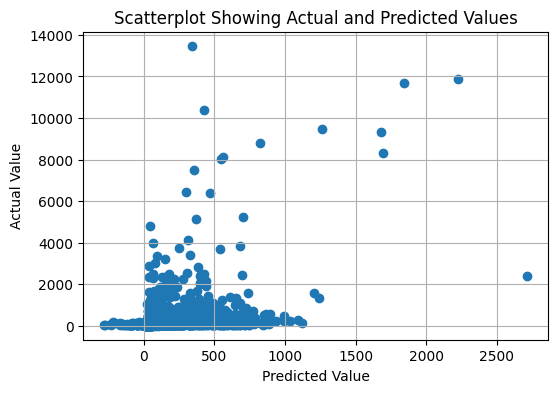

In [13]:
#Scatterplot respresenting the actual and predicted value
plt.figure(figsize=(6, 4))
plt.scatter(x=df_train['predicted'], y=df_train['value'])
plt.title('Scatterplot Showing Actual and Predicted Values')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.grid(True)
plt.show()

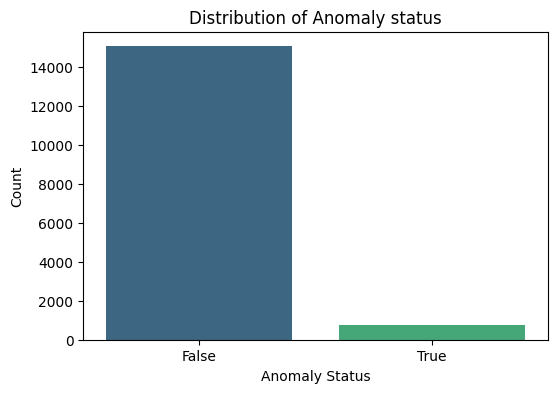

In [14]:
#visualizing the value counts of loan status
plt.figure(figsize=(6,4))
sns.countplot(x='is_anomaly', data=df_train, palette='viridis')
plt.title('Distribution of Anomaly status')
plt.xlabel('Anomaly Status')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [15]:
#Converting columns containing objects into numeric data type
le=LabelEncoder()
df_train['is_anomaly']=le.fit_transform(df_train['is_anomaly'])
df_train.head()

,timestamp,value,is_anomaly,predicted
0,1425008573,42,0,44.072500
1,1425008873,41,0,50.709390
2,1425009173,41,0,81.405120
3,1425009473,61,0,39.950367
4,1425009773,44,0,35.350160


## Splitting into Training & Testing Sets

In [16]:
#Separating the features and the target variable
X=df_train.drop(columns=['is_anomaly'])
y=df_train['is_anomaly']

In [17]:
#breaking the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [18]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning Algorithms

In [19]:
# Defining the the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluating model performances
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Performance of {name} - Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Performance of Logistic Regression - Accuracy: 0.962, Precision: 0.958, Recall: 0.962, F1 Score: 0.956
Performance of Support Vector Machine - Accuracy: 0.967, Precision: 0.966, Recall: 0.967, F1 Score: 0.960
Performance of K-Nearest Neighbors - Accuracy: 0.974, Precision: 0.972, Recall: 0.974, F1 Score: 0.972
Performance of Naive Bayes - Accuracy: 0.946, Precision: 0.936, Recall: 0.946, F1 Score: 0.939
Performance of Decision Tree - Accuracy: 0.965, Precision: 0.963, Recall: 0.965, F1 Score: 0.964
Performance of Random Forest - Accuracy: 0.971, Precision: 0.969, Recall: 0.971, F1 Score: 0.969


## Selected Model Performance

In [20]:
#Selected model: KNN with accuracy of 97.4%
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
#Checking accuracy,classification report 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

Accuracy: 0.974


,precision,recall,f1-score,support
0,0.978961,0.993660,0.986256,2997.000000
1,0.846774,0.621302,0.716724,169.000000
accuracy,0.973784,0.973784,0.973784,0.973784
macro avg,0.912868,0.807481,0.851490,3166.000000
weighted avg,0.971905,0.973784,0.971868,3166.000000


In [22]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[2978,   19],
       [  64,  105]], dtype=int64)

## Predicting Anomalies

In [23]:
scaler=StandardScaler()
df_test=scaler.fit_transform(df_test)
predictions = knn.predict(df_test)

In [24]:
predictions = ['TRUE' if pred == 1 else 'FALSE' for pred in predictions]
output = pd.DataFrame({'timestamp': test_ids, 'is_anomaly': predictions})

# Saving the output in form of CSV file
output.to_csv('predicted_anomalies.csv', index=False)
output.head()

,timestamp,is_anomaly
0,1396332000,FALSE
1,1396332300,FALSE
2,1396332600,FALSE
3,1396332900,FALSE
4,1396333200,FALSE


In [25]:
output['is_anomaly'].value_counts()

is_anomaly
FALSE    3291
TRUE      669
Name: count, dtype: int64